# 1. <a id='toc1_'></a>[QISKIT Lab 4 - Fermionic Hamiltonian](#toc0_)

1. **S. G. Nana Engo**, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
1. **J-P. Tchapet Njafa**, jean-pierre.tchapet-njafa@univ-maroua.cm
    * Department of Physics, Faculty of Science, University of Maroua
1. **P. Djorwe**, djorwepp@gmail.com
    * Department of Physics, Faculty of Science, University of Ngaoundere
       
May 2023

$$
\newcommand{\br}{\mathbf{r}}  
\newcommand{\ad}{a^\dagger}  
$$

**Table of contents**<a id='toc0_'></a>    
- 1. [QISKIT Lab 4 - Fermionic Hamiltonian](#toc1_)    
  - 1.1. [Structure électronique des molécules en première quantification](#toc1_1_)    
    - 1.1.1. [Hamiltonien d'une molécule](#toc1_1_1_)    
    - 1.1.2. [ Approximation de Born-Oppenheimer](#toc1_1_2_)    
    - 1.1.3. [Energie potentiel de surface](#toc1_1_3_)    
    - 1.1.4. [Déterminant Slater](#toc1_1_4_)    
    - 1.1.5. [Exemple d'illustration](#toc1_1_5_)    
  - 1.2. [Bases chimiques](#toc1_2_)    
    - 1.2.1. [Orbitales de type Slater](#toc1_2_1_)    
    - 1.2.2. [Do it yourself](#toc1_2_2_)    
    - 1.2.3. [Orbitales de type GTO](#toc1_2_3_)    
  - 1.3. [Construction d'un opérateur Hamiltonien fermionique](#toc1_3_)    
    - 1.3.1. [Génération des intégrales moléculaires](#toc1_3_1_)    
    - 1.3.2. [Répresentation nombre d'occupation](#toc1_3_2_)    
    - 1.3.3. [Opérateurs fermioniques](#toc1_3_3_)    
    - 1.3.4. [Représentation interne](#toc1_3_4_)    
    - 1.3.5. [Exercise](#toc1_3_5_)    
  - 1.4. [Qiskit Nature](#toc1_4_)    
    - 1.4.1. [Articulation des modules de Qiskit Nature](#toc1_4_1_)    
    - 1.4.2. [Cas de la molécule d'hygrogène](#toc1_4_2_)    
      - 1.4.2.1. [Information sur la structure moléculaire](#toc1_4_2_1_)    
    - 1.4.3. [`ElectronicStructureProblem` et ses composants](#toc1_4_3_)    
      - 1.4.3.1. [Hamiltonien `ElectronicEnergy`](#toc1_4_3_1_)    
      - 1.4.3.2. [Plus d'attributs du `ElectronicStructureProblem`](#toc1_4_3_2_)    
      - 1.4.3.3. [`FermionicOp` Class](#toc1_4_3_3_)    
        - 1.4.3.3.1. [Vérification de quelques quelques relations d'anticommutation fermioniques](#toc1_4_3_3_1_)    
        - 1.4.3.3.2. [Opérateur fermionique de la molécule $H_2$](#toc1_4_3_3_2_)    
    - 1.4.4. [Utilisation du plugin `qiskiy_nature_pyscf`](#toc1_4_4_)    
  - 1.5. [Cas de la molécule d'hydride de lithium](#toc1_5_)    
  - 1.6. [PySCF](#toc1_6_)    
    - 1.6.1. [Creating a molecule (mol) object with `gto.Mole()`](#toc1_6_1_)    
    - 1.6.2. [Accéder aux AO integrals](#toc1_6_2_)    
    - 1.6.3. [Calculs de champ moyen](#toc1_6_3_)    
      - 1.6.3.1. [Création d'un objet mean-field (mf) avec `scf.RHF()`](#toc1_6_3_1_)    
      - 1.6.3.2. [Création d'un objet mean-field (mf) avec scf.RKS()](#toc1_6_3_2_)    
      - 1.6.3.3. [xc attribute](#toc1_6_3_3_)    
      - 1.6.3.4. [nlc attribute](#toc1_6_3_4_)    
      - 1.6.3.5. [grids attribute/class](#toc1_6_3_5_)    
        - 1.6.3.5.1. [grids.level attribute](#toc1_6_3_5_1_)    
      - 1.6.3.6. [grids.atom_grid attribute](#toc1_6_3_6_)    
      - 1.6.3.7. [grids.atomic_radii attribute](#toc1_6_3_7_)    
      - 1.6.3.8. [grids.becke_scheme attribute](#toc1_6_3_8_)    
      - 1.6.3.9. [grids.prune attribute](#toc1_6_3_9_)    
      - 1.6.3.10. [grids.radi_method attribute](#toc1_6_3_10_)    
      - 1.6.3.11. [grids.radii_adjust attribute](#toc1_6_3_11_)    
      - 1.6.3.12. [grids.verbose attribute](#toc1_6_3_12_)    
      - 1.6.3.13. [nlcgrids attribute/class](#toc1_6_3_13_)    
      - 1.6.3.14. [small_rho_cutoff attribute](#toc1_6_3_14_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1.1. <a id='toc1_1_'></a>[Structure électronique des molécules en première quantification](#toc0_)

### 1.1.1. <a id='toc1_1_1_'></a>[Hamiltonien d'une molécule](#toc0_)

L'Hamiltonien d'une molécule constituée de noyaux $K$ et d'électrons $N$ est
\begin{equation*}
\mathtt{H}=\mathtt{T}_e+\mathtt{T}_n+\mathtt{U}_{en}+\mathtt{U}_{en}+\mathtt{U}_{nn},
\end{equation*}
où
- $\mathtt{T}_e= -\sum_i\frac{\hbar^2}{2m_e}\nabla^2_i$ est l'énergie cinétique électronique;
- $\mathtt{T}_n=-\sum_I\frac{\hbar^2}{2M_I}\nabla^2_I$ est l'énergie cinétique nucléaire;
- $\mathtt{U}_{en}= -\sum_{i,I}\frac{e^2}{4\pi\epsilon_0}\frac{Z_I}{|\mathbf{r}_i-\mathbf{R}_I|}$ est la répulsion coulombienne entre les électrons et les noyaux;
- $\mathtt{U}_{ee}=+\frac{1}{2}\sum_{i\neq j}\frac{e^2}{4\pi\epsilon_0}\frac{1}{|\mathbf{r}_i-\mathbf{r}_j|}$ est la répulsion coulombienne entre les électrons eux-mêmes;
- $\mathtt{U}_{nn}=+\frac{1}{2}\sum_{I\neq J}\frac{e^2}{4\pi\epsilon_0}\frac{Z_IZ_J}{|\mathbf{R}_I-\mathbf{R}_J|}$ est la répulsion coulombienne entre les noyaux eux-mêmes.

$M_I$, $\mathbf{R}_I$ et $Z_I$ ($I=1,2$) désignent la masse, la position et le numéro atomique du *I*-ème noyau, et $\mathbf{r}_i$ est la position du *i*-ème électron. Par souci de concision, nous travaillons en unités atomiques, où l'unité de longueur est $a_0 = 1$ Bohr ($0.529167~\mathtt{T}imes~10^{-10}$ m), l'unité de masse est la masse électronique $m_e$ et l'unité d'énergie est 1 Hartree ($1~\textrm{Hartree}~= ~{e^2}/{4\pi\epsilon_0 a_0}~=~27.2113~\textrm{eV}$). Dénotant $M_I'=M_I/m_e$, les différents termes de l'Hamiltonien moléculaire en unités atomiques s'écrit
\begin{equation*}
\begin{split}
\mathtt{T}_e&=-\sum_i\frac{\nabla^2_i}{2}, \qquad\mathtt{T}_n= -\sum_I\frac{\nabla^2_I}{2M_I'}, 
 \qquad\mathtt{U}_{en}= - \sum_{i,I}\frac{Z_I}{|\mathbf{r}_i-\mathbf{R}_I|},\\
\mathtt{U}_{ee}&=+\frac{1}{2}\sum_{i\neq j}\frac{1}{|\mathbf{r}_i-\mathbf{r}_j|}
=+\sum_{i,j>i}\frac{1}{|\mathbf{r}_i-\mathbf{r}_j|},\\
\mathtt{U}_{nn}&=+\frac{1}{2}\sum_{I\neq J}\frac{Z_IZ_J}{|\mathbf{R}_I-\mathbf{R}_J|}
=+\sum_{I,J>I}\frac{Z_IZ_J}{|\mathbf{R}_I-\mathbf{R}_J|}.
\end{split}
\end{equation*}

### 1.1.2. <a id='toc1_1_2_'></a>[ Approximation de Born-Oppenheimer](#toc0_)

Nous nous intéressons principalement à la structure *électronique* de la molécule. Comme $M'\sim10^3$, nous appliquons l'**approximation de Born-Oppenheimer**, en traitant les noyaux comme des charges ponctuelles classiques. En conséquence, le terme d'énergie cinétique nucléaire $T_n$ est négligé, $\mathtt{U}_{nn}(\mathbf{R})$ est constant et l'Hamiltonien moléculaire est approché par un Hamiltonien électronique paramétré par $\mathbf{R}$,
\begin{equation*}
\begin{split}
\mathtt{H}(\mathbf{R}) &= \mathtt{U}_{nn}+\underset{\text{One-Electron Operators}}{\mathtt{T}_e + \mathtt{U}_{en}(\mathbf{R})} + \underset{\text{Two-Electron Operator}}{\mathtt{U}{ee}}\\
&= \mathtt{U}_{nn}+\underset{\text{One-Electron Operator}}{\sum_i h(i)} + \underset{\text{Two-Electron Operator}}{\sum_{i\ne j}v(i, j)}.
\end{split}
\end{equation*}

### 1.1.3. <a id='toc1_1_3_'></a>[Energie potentiel de surface](#toc0_)

En vertu de l'équation de $\mathtt{H}(\mathbf{R})$ préceédente, l'équation de Schrödinger indépendante du temps non relativiste écrit
\begin{equation*}
\mathtt{H}(\mathbf{R})\psi_i(\mathbf{R},\mathbf{r})=E_i(\mathbf{R})\psi_i(\mathbf{R},\mathbf{r}),
\end{equation*}
où $\psi_i(\mathbf{R},\mathbf{r})$ désigne l'un des états propres et $E_i(\mathbf{R})$ correspond aux surfaces d'énergie potentielle moléculaire (PES), ce qui est important pour comprendre les processus chimiques tels que la formation et la rupture de liaison. En règle générale, la précision du calcul du PES (Potential Energy Surface) doit être limitée à la *précision chimique* $\epsilon=1 \textrm{kcal}\textrm{mol}^{-1}(\sim 1.59\times 10^{-3}\textrm{Hartrees},\, 43.3\textrm{meV})$.

L'énergie de l'état fondamental est donnée par
\begin{equation}\label{eq:EtFond}
E_0 = \frac{\langle\psi_0|\mathtt{H}|\psi_0\rangle}{\langle\psi_0|\psi_0\rangle},
\end{equation}
où $|\psi_0\rangle$ est l'état fondamental du système. Cependant, la dimensionnalité de ce problème croît exponentiellement avec le nombre de degrés de liberté. Pour résoudre ce problème, nous aimerions préparer $|\psi_0\rangle$ sur un calculateur quantique et mesurer directement la valeur moyenne Hamiltonienne (ou $E_0$). Alors, comment pouvons-nous faire cela concrètement?

Un bon point de départ pour résoudre ce problème est la méthode Hartree-Fock (HF), autrement nous allons prendre comme fonction d'état de réféfrence la fonction d'état HF. Cette méthode rapproche un problème à N corps en N problèmes à un corps où chaque électron évolue dans le champ moyen des autres.  Il est à noter que le dénominateur de l'équation \eqref{eq:EtFond} n'est nécessaire que quand la fonction d'etat HF n'est pas normalisée au départ. Une facon d'améliorer cette fonction d'état HF est d'utiliser une combinaison linéaire des fonction d'état. Ce qui sera fait à travers les bases chimiques.


### 1.1.4. <a id='toc1_1_4_'></a>[Déterminant Slater](#toc0_)

Un déterminant de Slater est un produit anti-symétrique d'un ou de plusieurs spin orbitals. Pour un système à $N$-electron, le déterminant de Slater s'écrit
\begin{equation*}
\begin{split}
\psi(\br_0, \br_1, \ldots, \br_{N-1})\equiv |\phi_{M-1},\cdots,  \phi_1, \phi_0 \rangle 
&=   \frac{1}{\sqrt{N!}}
\begin{vmatrix} \phi_0(\br_0) & \phi_1(\br_0) & \cdots & \phi_{M-1}(\br_0) \\
      \phi_0(\br_1) & \phi_1(\br_1) & \cdots & \phi_{M-1}(\br_1) \\
      \vdots & \vdots & \ddots & \vdots \\
      \phi_0(\br_{N-1}) & \phi_1(\br_{N-1}) & \cdots & \phi_{M-1}(\br_{N-1})
\end{vmatrix} \\
&\equiv |M-1,\dots, 1, 0 \rangle,
\end{split}
\end{equation*}
 L'échange des positions de deux électrons est équivalent à l'échange de deux rangées du déterminant de Slater, ce qui modifie le signe de la fonction d'état. Cela fournit la symétrie d'échange correcte pour la fonction d'état fermionique. Bien que le nombre de spin-orbitales considérées, $M$, soit généralement plus élevé que le nombre d'électrons dans le système, $N$, les électrons ne peuvent occuper que $N$ des spin-orbitales dans un déterminant Slater donné. En conséquence, le déterminant de Slater ne contient que les spin-orbitales occupées $N$.

### 1.1.5. <a id='toc1_1_5_'></a>[Exemple d'illustration](#toc0_)

Pour rendre les correspondances plus claires, nous examinons comment une fonction d'état sera représentée pour un système quantique fictif. On considère les
orbitales de spin $|A_\uparrow\rangle,\,|A_\downarrow\rangle,\,|B_\uparrow\rangle,\,|B_\downarrow\rangle$. Nous sommes libres de définir arbitrairement l'état Hartree-Fock de notre système fictif et de choisir les deux électrons dans l'orbitale $|A\rangle $. Nous sommes intéressés par la fonction d'état lorsque la composante $z$ du spin est nulle.

Labellisons chaque orbitale ainsi qu'il suit :
\begin{align*}
 &|A_\uparrow\rangle=|00\rangle=|\mathbf{0}\rangle,  &&|A_\downarrow\rangle=|01\rangle=|\mathbf{1}\rangle,
&&|B_\uparrow\rangle=|10\rangle=|\mathbf{2}\rangle,  &|B_\downarrow\rangle=|11\rangle=|\mathbf{3}\rangle.
\end{align*}
L'état de Hartree-Fock possède les deux électrons dans les orbitales $|A\rangle$. Un état HF incorrectement symétrisé serait donc $|A_\uparrow\rangle_1
|A_\downarrow\rangle_2 = |\mathbf{0}\rangle_1|\mathbf{1}\rangle_2$, où les indices indiquent l'électron décrit par chaque orbitale. La fonction d'état HF correctement antisymétrisée serait 
\begin{equation*}
\begin{split}
    |\Psi_{\mathrm{HF}}\rangle =  \frac{1}{\sqrt{2}}
		\begin{vmatrix}
		A_\uparrow(\mathbf{x}_0) & A_\downarrow(\mathbf{x}_0)\\
		A_\uparrow(\mathbf{x}_1) & A_\downarrow(\mathbf{x}_1)\\
		\end{vmatrix}
		&= \frac{1}{\sqrt{2}}  \Big( A_\uparrow(\mathbf{x_0}) A_\downarrow(\mathbf{x_1}) - A_\downarrow(\mathbf{x_0}) A_\uparrow(\mathbf{x_1})  \Big)\\
&=\frac{1}{\sqrt{2}} (|\mathbf{0}\rangle_1|\mathbf{1}\rangle_2 - |\mathbf{1}\rangle_1|\mathbf{0}\rangle_2 ).
\end{split}
\end{equation*}
Si nous considérons maintenant les excitations au-dessus de l'état HF, alors une fonction d'état générale avec $s_z=0$ qui a été correctement antisymétrisée est
donnée par
\begin{equation*}
\begin{aligned}
|\Psi\rangle =& \frac{\alpha}{\sqrt{2}}(|\mathbf{0}\rangle_1|\mathbf{1}\rangle_2 - |\mathbf{1}\rangle_1|\mathbf{0}\rangle_2 ) 
+\frac{\beta}{\sqrt{2}} (|\mathbf{2}\rangle_1|\mathbf{3}\rangle_2 - |\mathbf{3}\rangle_1|\mathbf{2}\rangle_2 ) \\
+& \frac{\gamma}{\sqrt{2}} (|\mathbf{0}\rangle_1|\mathbf{3}\rangle_2 - |\mathbf{3}\rangle_1|\mathbf{0}\rangle_2 ) + \frac{\delta}{\sqrt{2}} (|\mathbf{1}\rangle_1|\mathbf{2}\rangle_2 - |\mathbf{2}\rangle_1|\mathbf{1}\rangle_2 ).
\end{aligned}
\end{equation*}
Comme nous avons $N=2$ électrons et $M=4$ spin-orbitales, nous pouvons voir que nous avons seulement besoin de $N \lceil\mathrm{log_2}(M)\rceil = 2 \times \lceil\mathrm{log_2}(4)\rceil = 4$ qubits pour stocker la fonction d'état.


## 1.2. <a id='toc1_2_'></a>[Bases chimiques](#toc0_)

Un ensemble de base est un ensemble de fonctions, appelées **[fonctions de base](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Quantum_Mechanics/17%3A_Quantum_Calculations/ab_initio_Basis_Sets)**, telles que toute orbitale moléculaire électronique peut être approchée
comme une **combinaison linéaire de ses orbitales atomiques (LCAO, Linear combination of atomic orbitals)**.

Les deux classes d'orbitales de base approximatives couramment utilisées sont les **Slater-type orbitals (STOs)** basées sur le déterminant de Slater, et les **orbitales cartésiennes de type Gaussien (GTO)**. Ces deux types de fonctions de base peut être combiné comme **STO-nG (Slater-type orbital-n Gaussians)**, où n est le nombre de gaussiennes utilisées pour faire les approximations.

Détaillons la structure de ces deux classes.

### 1.2.1. <a id='toc1_2_1_'></a>[Orbitales de type Slater](#toc0_)
 Ce sont les fonctions d'état radiales de la forme

 \begin{align*}
& R_\ell(r) = A(\ell,\zeta) r^\ell e^{-\zeta r},
& A(\ell,\zeta) = (2\zeta)^{\ell+1} \sqrt{\frac{2\zeta}{(2\ell+2)!}},
\end{align*}

où,
 * $\ell< n$ est le nombre quantique de moment quantique orbital et $n$ le nombre quantique principal;
 * $r$ est la distance entre l'électron et le noyau atomique;
 * $\zeta$ est l'exposant orbital qui contrôle la vitesse à laquelle la densité de l'orbite s'annule en fonction de la distance nucléaire $r$;
 * $A(\ell,\zeta)$ est le facteur de normalisation.

Pour une orbitale $1s$, $\ell=0$ et
\begin{align*}
&A(0,\zeta) = 2\zeta^{3/2}, &R_0(r) =2\zeta^{3/2}e^{-\zeta r}.
\end{align*}

Un code python permettant de visualiser cette fonction est le suivant:

In [130]:
import numpy as np
import matplotlib.pyplot as plt

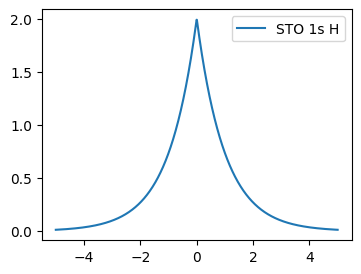

In [131]:
x = np.linspace(-5,5,num=1000)
r = abs(x)
zeta = 1.0

R = 2*zeta**(1.5)*np.exp(-zeta*r)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="STO 1s H")
plt.legend()

### 1.2.2. <a id='toc1_2_2_'></a>[Do it yourself](#toc0_)

Ecriver un code python pour visualiser STO 2s H.

Un code python permettant visualiser la fonction d'état spatiale antisymétrique pour la molécule d'hydrogène comme une combinaison linéaire de la partie radiale précédente de l'orbitale de Slater pour un atome d'hydrogène est la suivante:

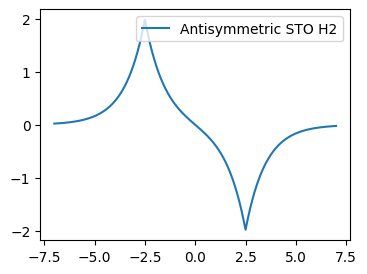

In [132]:
x = np.linspace(-7,7,num=1000)
r1 = abs(x+2.5)
r2 = abs(x-2.5)
alpha = 1.0

R = 2*alpha**(1.5)*np.exp(-alpha*r1)-2*alpha**(1.5)*np.exp(-alpha*r2)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="Antisymmetric STO H2")
plt.legend()


### 1.2.3. <a id='toc1_2_3_'></a>[Orbitales de type GTO](#toc0_)

Ce sont les fonctions d'état radiales de la forme

 \begin{align*}
 &R_a = B(\ell,\alpha_a) r_a^\ell e^{-\alpha_a r_a^2},
 &B(\ell,\alpha_a) = \Bigg(\frac2\pi\Bigg)^{3/4}\frac{2^{(n+\ell+m)}\alpha_a^{(2n+2\ell+2m+3)/4}}{\sqrt{(2n-1)!(2\ell-1)!(2m-1)!}},
\end{align*}
où,
 * $n$ est le nombre quantique principal, $\ell< n$ le nombre quantique de moment quantique orbital et $m\in[-\ell.+\ell]$ le nombre quantique azimutal;
 * $r_a$ est la distance entre l'électron et le noyau atomique **a**;
 * $\alpha_a$ est l'exposant orbital qui contrôle la vitesse à laquelle la densité de l'orbite s'annule en fonction de la distance nucléaire $r_a$. Plus $\alpha_a$ est petit, plus l'orbitale décrite est diffuse. Plus $\alpha_a$ est grand, plus l'orbitale est polarisée;
 * $B(\ell,\alpha_a)$ est le facteur de normalisation.

En pratique, nous approximons la partie radiale d'un STO avec une combinaison linéaire de fonctions Gaussiennes primitives, appelée **fonction Gaussienne contractée**. Les ensembles de base STO-nG incluent une fonction Gaussienne contractée par orbitale atomique.

Un code python permettant de visualiser la fonction STO-3G pour l'orbite 1s de l'atome d'hydrogène fonction est le suivant:

 \begin{align*}
 &\Psi_{\rm STO-3G} (1s)= \sum_{i=1}^3 B_i(0,\alpha_i) e^{-\alpha_i r^2},
 &B(0,\alpha_i) = c_i\Bigg(\frac{2 \alpha_i}{\pi}\Bigg)^{3/4},
\end{align*}
avec 
$$ \begin{array}{|l|l|l|l|}
c_i & 0.444635 & 0.535328 & 0.154329\\\hline
\alpha_i& 0.109818 & 0.405771 & 2.227660\\
\end{array}
$$

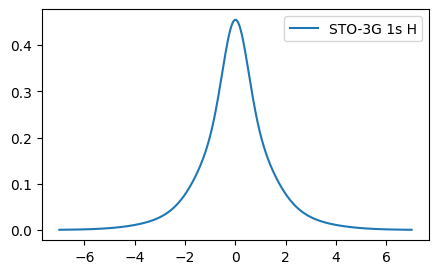

In [133]:
x = np.linspace(-7,7,num=1000)
r = abs(x)
c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
    psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="STO-3G 1s H")
plt.legend()


Un code python permettant de visualiser la fonction d'état spatiale antisymétrique pour la molécule d'hydrogène comme une combinaison linéaire de la partie radiale précédente de la fonction STO-3G pour l'orbite $1s$ d'un atome d'hydrogène est le suivant :

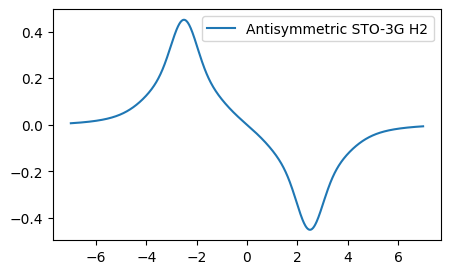

In [134]:
x = np.linspace(-7,7,num=1000)
r1 = abs(x+2.5)
r2 = abs(x-2.5)
c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
    psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-
alpha[k]*r1**2) \
- c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r2**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="Antisymmetric STO-3G H2")
plt.legend()

## 1.3. <a id='toc1_3_'></a>[Construction d'un opérateur Hamiltonien fermionique](#toc0_)

### 1.3.1. <a id='toc1_3_1_'></a>[Génération des intégrales moléculaires](#toc0_)

L'Hamiltonien  est exprimé dans la base des solutions de la méthode HF, également appelées Orbitales Moléculaires (OM) :
$$
\mathtt{H}_{elec}=\sum_{pq} h_{pq} a^{\dagger}_p a_q + 
\frac{1}{2} \sum_{pqrs} h_{pqrs}  a^{\dagger}_p a^{\dagger}_q a_r  a_s
$$
avec 
* les **intégrales à 1 électron**
$$
h_{pq} = \int \phi^*_p(r) \left( -\frac{1}{2} \nabla^2 - \sum_{I} \frac{Z_I}{|\mathbf{r}_i-\mathbf{R}_I|} \right)   \phi_q(r)d\mathbf{r}
$$
qui décrivent l’énergie cinétique des électrons individuels et leurs interactions Coulombiennes avec les champs électriques du noyau ;
* et **intégrales à 2 électrons**
$$
h_{pqrs} = \int \frac{\phi^*_p(r_1)  \phi^*_q(r_2) \phi_r(r_2)  \phi_s(r_1)}{|\mathbf{r}_1-\mathbf{r}_2|}d\mathbf{r}_1d\mathbf{r}_2,
$$
décrivent les interactions Coulombiennes entre les électrons;
* $\ad_p$ l'opérateur de création d'un électron sur le spin-orbite $p$;
* $a_q$ l'opérateur d'annihilation d'un électron sur sur le spin-orbite $q$;
* $a^{\dagger}_p a_q $ est l'**opérateur d'excitation**, qui excite un électron du spin-orbite occupé $\phi_q$ vers le spin-orbite inoccupé $\phi_p$.

Les MO ($\phi_u$) peuvent être occupés ou virtuels (inoccupés). Un MO peut contenir 2 électrons. Ces MO sont les solutions de la méthode HF, où chaque l´electron est soumis au champ moyen créé par les autres électrons. Cependant, dans ce qui suit, nous travaillons en fait avec des orbitales de spin qui sont associées à un spin up ($\alpha$) d'électron spin down ($\beta$). Ces deux spins sont également communément désignés par $\alpha$ et $\beta$, respectivement. Ainsi, les orbitales de spin peuvent contenir un électron ou être inoccupées.

Dans le tableau ci-dessous, on a les correspondances première-seconde quantification des divers éléments du Hamiltonien moléculaire. 
$$
\begin{array}{|l|l|l|}\hline
\textbf{Approximation BO}  &  \textbf{Combinaison en 2e quantification} &  \textbf{Description}
\\\hline
-\frac12\sum_i\nabla^2_i & -\frac12\sum_{p,q}\langle p|\nabla^2_p|q\rangle \ad_p a_q & \mathtt{T}_e \\\hline
 -\sum_{i,I}\frac{Z_I}{|\mathbf{r}_i-\mathbf{R}_I|} &
 -\sum_{p,q} \langle p|\frac{Z_I}{|\mathbf{r}_p-\mathbf{R}_I|}|q\rangle \ad_p a_q
 & \mathtt{U}_{en}\\\hline
\sum_{i,j>i}\frac{1}{|\mathbf{r}_i-\mathbf{r}_j|} & 
\sum_{p,q,r,s}\langle pq \big|\frac{1}{|\mathbf{r}_i-\mathbf{r}_j|}\big|rs\rangle \ad_p \ad_q a_r a_s & 
 \mathtt{U}_{ee}\\\hline
\end{array}
$$

Les trois méthodes HF communément utilisées sont (voir la figure ci-dessous) :
1. **RHF (Restricted Hartree – Fock)** utiliśee pour des molécules à couches pleines ou fermées. Les spin-orbitales sont soit $\alpha$, soit $\beta$ et tous les orbitales sont doublement occupés par des spin-orbitales $\alpha$ et $\beta$;</br> 
2. **ROHF (Restricted Open-Shell Hartree–Fock)** utilisée pour des molécules à couches ouvertes où le nombre d'électrons les orbitales n'est pas le même. ROHF utilise autant que possible les orbitales doublement occupées et les orbitales une fois occupées par les électrons non-apariés;
3. **UHF (Unrestricted Hartree-Fock)** utilisée pour des molécules à couches ouvertes où le nombre d'électrons les orbitales n'est pas le même. Les orbitales ROHF peuvent avoir avoir des spin $\alpha$ ou $\beta$, mais les orbitales $\alpha$ et $\beta$ peuvent avoir des composants spatiales différents.

<center>
 <img src='./Graphics/HF_Orb.png' width=400 /> 
</center>

*Un des avantages apporté par le formalisme de seconde quantification est que la propriété d'anti-symétrie des fonctions d'état pour l'échange de fermions identiques, prise en compte manuellement dans une approche de première quantification en considérant les déterminants de Slater, est automatiquement imposée par le relations d'anti-commutation des opérateurs de création et d'annihilation. Cependant, le prix à payer est de travailler avec un nombre non fixe de particules, qui reste de toute façon une quantité conservée.*

Les coefficients $h_{pq}$ et $h_{pqrs}$ sont définis par l'ensemble de base (basis ste) qui a été choisi pour le problème (sto-3g dans la plupart de nos exemples) ;
cependant le calcul de ces coefficients en général peut être assez complexe. En particulier, dans de nombreux cas, il est logique d'effectuer d'abord un calcul Hartree-Fock et de transformer les intégrales ci-dessus en la base orbitale moléculaire qui en résulte. Cela a l'avantage de rendre l'état de champ moyen facile à représenter à la fois sur un calculateur classique et quantique, mais introduit quelques défis en ce qui concerne le coût de la transformation intégrale et la convergence du calcul Hartree-Fock pour les systèmes complexes. Par exemple, il est nécessaire de spécifier une estimation initiale (*initial guess*) pour les orbitales de Hartree-Fock, la méthode utilisée pour résoudre les équations et un certain nombre d'autres paramètres numériques qui affectent la convergence.


### 1.3.2. <a id='toc1_3_2_'></a>[Répresentation nombre d'occupation](#toc0_)

En seconde quantification, le déterminant de Slater est représenté par un **vecteur nombre d'occupation**
\begin{equation*}
|f\rangle =|f_{M-1},\dots,f_{i-1},f_i,f_{i+1},\dots, f_0\rangle, 
\end{equation*}
avec
- $f_i=1$ lorsque le spin-orbital $\phi_i$ est occupé et donc présent dans le déterminant de Slater;
- $f_i = 0$ lorsque le $\phi_i$ spin-orbital est vide et donc absent du déterminant de Slater.

- Le vecteur $|f_i\rangle$ est appelé **vecteur nombre d'occupation de l'orbite fermionique i**, parce que
\begin{align*}
& |0\rangle=\begin{pmatrix}1\\0\end{pmatrix}:\text{état vide}, & |1\rangle=\begin{pmatrix}0\\1\end{pmatrix}:\text{état occupé}.
\end{align*}

Dans la deuxième représentation de quantification, au lieu de poser la question *Quel électron est dans quel état?*, nous posons la question *combien de particules y a-t-il dans chaque état?*.

### 1.3.3. <a id='toc1_3_3_'></a>[Opérateurs fermioniques](#toc0_)

Les opérateurs fermioniques $\ad_i$ et $a_i$ obéissent aux relations d'anticommutation fermioniques suivantes:
\begin{align*}
&\{a_p,\ad_q\} = a_p\ad_q + \ad_q a_p = \delta_{pq}, 
&\{a_p, a_q \} = \{\ad_p, \ad_q\} = 0 .
\end{align*}
La nature fermionique des électrons implique que les fonctions d'état à plusieurs électrons doivent être antisymétriques par rapport à l'échange de particules. Cela se reflète dans la manière dont les opérateurs de création fermionique et d'annhilation agissent sur les déterminants $\ket{f}$:
\begin{equation*}
\begin{aligned}
&a_i|f_{M-1},\dots,f_{i-1},f_i,f_{i+1},\dots, f_0\rangle = \delta_{f_i,1}
(-1)^{\sum_{m<i}f_m}|f_{M-1},\dots,f_{i-1},f_i\oplus 1,f_{i+1},\dots, f_0\rangle,\\
&\ad_i|f_{M-1},\dots,f_{i-1},f_i,f_{i+1},\dots, f_0\rangle = \delta_{f_i,0}
(-1)^{\sum_{m<i}f_m}|f_{M-1},\dots,f_{i-1},f_i\oplus 1,f_{i+1},\dots, f_0\rangle`,  \\
&a|0\rangle=\ad|1\rangle=0.
\end{aligned}
\end{equation*}
- Le terme de phase $p_i=(-1)^{\sum_{m<i}f_m}$ désigne la parité qu'impose l'anti-symétrie d'échange des fermions.
    - $p_i=-1$ si le nombre d'électrons est impair dans ces orbitales de spin,
    - $p_i= 1$ si le nombre d'électrons est pair dans ces orbitales de spin.

- Le symbole $\oplus$ représente l'addition modulo 2, i.e.,  $1 \oplus 1=0 $ et $0 \oplus 1=1$.

- L'opérateur de création $\ad_i$ met un électron dans une orbitale inoccupée *i* ou dans $|f_i\rangle$.

- L'opérateur d'annihilation $a_i$ supprime un électron dans une orbitale occupée *i* ou en $|f_i\rangle$.

- $a_i^2 =(\ad_i)^2= 0$ pour tout $i$. On ne peut pas créer ou anéantir un fermion dans le même mode deux fois.

Par example,
\begin{align*} 
&\ad_1 |0\rangle_1 = |1\rangle_1,&&\ad_1 |1\rangle_1 =(\ad_i)^2|0\rangle_1= 0,&& a_1 |1\rangle_1 =|0\rangle_1,&a_1 |0\rangle_1 =a_1^2|1\rangle_1=0. 
\end{align*}
Notez qu'ici $\ad_1|1\rangle_1=0$ et $a_1 |0\rangle_1=0$ signifie le vecteur zéro et non $|0\rangle_1$. 

En utilisant également de tels opérateurs, nous pouvons exprimer
\begin{equation*}
|0\rangle |1\rangle |1\rangle |0\rangle = \ad_1\ad_2 |0\rangle^{\otimes 4}.
\end{equation*}

 L'opérateur d'occupation orbitale est donné par
\begin{align*}
&n_i = \ad_i a_i, &n_i |f_{M-1},\dots,f_i,\dots, f_0\rangle= f_i |f_{M-1},\dots,f_i,\dots, f_0\rangle,
\end{align*}
et il compte le nombre d'électrons dans une orbitale donnée, c'est-à-dire
\begin{align*} 
&n_i |0\rangle_i = 0, &n_i |1\rangle_i = |1\rangle_i. 
\end{align*}


### 1.3.4. <a id='toc1_3_4_'></a>[Représentation interne](#toc0_)

On peut avoir une idée de ce que les termes intégraux signifie en observant les opérateurs de création et d’annihilation qui les composent. Par exemple, 
* $h_{pq} a^{\dagger}_p a_q$ (**opérateur d'excitation**) décrit les sauts d’électron de l’orbital de rotation $q$ à l’orbital de rotation $p$;
* $ h_{pqrs}  a^{\dagger}_p a^{\dagger}_q a_r a_s$ (pour un p,q,r,s distinct) décrit deux électrons dans des orbitals de rotation $r$ et $s$ se dispersant et se terminant par des orbitals de rotation $p$ et $q$. Si $r=q$ et $p=s$ alors $ h_{prrp}  a^{\dagger}_p a^{\dagger}_r a_r  a_p = h_{prrp}n_pn_r$ (**opérateur de Coulom ou d'échange**) donne la pénalité d’énergie associée aux deux électrons proches l’un de l’autre, mais ne décrit pas un processus dynamique.

*Appliqué à un état électronique, l'Hamiltonien moléculaire produit une combinaison linéaire de l'état d'origine avec des états générés par des excitations à un ou deux électrons à partir de cet état. A chaque excitation est associée une amplitude $h_{pq}$ ou $h_{pqrs}$, représentant la probabilité que cet événement se produise.*

Dans l'expression de l'Hamiltonien, il existe au maximum $N^2+N^4$ coefficients. Cependant, un grand nombre de ces coefficients peuvent être collectés, car ils correspondent au même opérateur. Par exemple, dans le cas où $p,q,r,s$ sont des indices distincts, on peut utiliser les règles d'anti-commutation pour indiquer que :
$$
\ad_p\ad_qa_ra_s = -\ad_q\ad_pa_ra_s = -\ad_p\ad_qa_sa_r = \ad_q\ad_pa_sa_r.
$$}
En outre, comme $\mathtt{H}$ est Hermitien, tout opérateur fermionique non Hermitien, par exemple $h_{pqrs}\ad_p\ad_qa_ra_s$, a un conjugué Hermitien qui se trouve également dans $\mathtt{H}$. Afin d'indexer de manière unique les groupes de termes caractérisés par ces symétries, nous définissons un ordre canonique sur les indices $(i_{n-1},\cdots,i_0,j_{m-1},\cdots,j_0)$ de toute suite de $n+m$ opérateurs fermioniques $ \ad_{i_{m-1}}\cdots \ad_{i_0}a_{j_{n-1}}\cdots a_{j_0}$ comme suit :

* Tous les opérateurs de création $\ad_{i_\cdot}$ sont placés avant tous les opérateurs d'annihilation $a_{j_\cdot}$;</br>
* Tous les index des opérateurs de création sont triés par ordre croissant, c'est-à-dire $i_0< i_1< \cdots < i_{n-1}$;</br>
* Tous les indices des opérateurs d'annihilation sont triés par ordre décroissant, c'est-à-dire $j_0> j_1 \cdots > j_{m-1}$;</br>
* L'index le plus à gauche est inférieur ou égal à l'index le plus à droite, c'est-à-dire $i_0\le j_{m-1}$.

Identifions cet ensemble d'indices canoniquement ordonnés comme
$$
(i_{n-1},\cdots,i_0,j_{m-1},\cdots,j_0) \in S_{n,m}.
$$
Avec cet ordre canonique, l'Hamiltonien fermionique peut être exprimé comme
$$
\mathtt{H}=\frac12\sum_{(p,q)\in S_{1,1}}h'_{pq}(\ad_pa_q+\ad_qa_p)
+\frac12\sum_{(p,q,r,s)\in S_{2,2}}h'_{pqrs}(\ad_p\ad_qa_ra_s+\ad_s\ad_ra_qa_p),
$$
avec des intégrales à un et deux électrons convenablement adaptées $h'_{pq}$ et $h'_{pqrs}$, respectivement.


### 1.3.5. <a id='toc1_3_5_'></a>[Exercise](#toc0_)

In **Exemple d'illustration** of **Qiskit Lab 4**, we have considered a fictitious system described by spin orbitals $|A_\uparrow\rangle,\,|A_\downarrow\rangle,\,|B_\uparrow\rangle,\,|B_\downarrow\rangle$ labelled as
\begin{align*}
 &|A_\uparrow\rangle=|00\rangle=|\mathbf{0}\rangle,  &&|A_\downarrow\rangle=|01\rangle=|\mathbf{1}\rangle,
&&|B_\uparrow\rangle=|10\rangle=|\mathbf{2}\rangle,  &|B_\downarrow\rangle=|11\rangle=|\mathbf{3}\rangle.
\end{align*}
We assume that the Hartree-Fock state for this system **has both electrons occupying the $|A\rangle$ orbitals**. We store the occupations of the spin orbitals $|A_\uparrow\rangle,\,|A_\downarrow\rangle,\,|B_\uparrow\rangle,\,|B_\downarrow\rangle$ which we order as 
$|f_{B_\downarrow},f_{B_\uparrow},f_{A_\downarrow},f_{A_\uparrow}\rangle$, with $f_i=0,1$ (in the fermionic Fock space).

1. Write down, in the fermionic Fock space, the Hartree-Fock state $|\Psi_{\rm HF}\rangle$, that is, the corresponding of the antisymmetrized Slater deter-
minant obtained in **Exemple d'illustration**.
1. Write down, in the fermionic Fock space, the $s_z = 0$ state function.


## 1.4. <a id='toc1_4_'></a>[Qiskit Nature](#toc0_)

Ce tutoriel utilise essentiellement le package Qiskit Nature dont la conception abstraite est donnée par la figure ci-dessous.

<center><img src="Graphics/Qiskit_Nature_overview.png" width="700" /></center>

Le package se divise en deux concepts avec chacun trois piliers chacun :

* `problems`,  qui sont des représentations de problèmes scientifiques auxquels on cherche une solution;
    * _Electronic Structure Problem_ représentant le problème de l'équation de Schrödinger électronique des systèmes moléculaires;

    * _Vibrational Structure Problem_ représentant le problème posé par l'Hamiltonien de Watson des systèmes moléculaires;

    * _Lattice Model Problem_ représentant les problèmes définis sur des treillis;

* `algorithms`, qui fournissent les moyens de trouver des solutions auxdits problèmes;

    * _Ground State Solver_ pour trouver l'état fondamental d'un problème;

    * _Excited States Solver_ pour trouver les états excités d'un problème;

    * _Hamiltonian Simulation_ pour simuler la dynamique d'un problème (pas encore implémenté).

### 1.4.1. <a id='toc1_4_1_'></a>[Articulation des modules de Qiskit Nature](#toc0_)

La bibliothèque Qiskit Nature comprend différents modules s'articulant autour de :

- chargement de données à partir de pilotes (drivers) de chimie (PySCF, Psi4, Gaussian, etc.) ou de formats de fichiers;
- construction et manipulation d'opérateurs de seconde quantification;
- traduction de la seconde quantification à l'espace qubit;
- une bibliothèque de circuits quantiques d'analyses ciblées en sciences naturelles;
- algorithmes et utilitaires spécifiques aux sciences naturelles pour utiliser  les algorithmes de `Qiskit Terra` plus faciles;
- et beaucoup plus.

Par exemple, les pilotes (drivers) de chimie, lorsqu'ils sont fournis avec une configuration moléculaire, renverront des intégrales à 1 ($h_{pq}$) et 2 ($h_{pqrs}$) corps, ainsi que d'autres données qui sont efficacement calculées de manière classique. Ces données de sortie d'un pilote peuvent ensuite être utilisées comme entrée dans Qiskit Nature qui contient une logique capable de les traduire sous une forme adaptée aux algorithmes quantiques. La conversion crée d'abord un `FermionicOperator` qui doit ensuite être mappé, par ex. par une cartographie de **Jordan Wigner**, à un opérateur qubit prêt pour le calcul quantique.

> pip install qiskit-nature[pyscf] -U

Nous allons utiliser le plugin `qiskit_nature_pyscf` qui couple PySCF et Qiskit Nature.  C'est un solveur [FCI](https://en.wikipedia.org/wiki/Full_configuration_interaction) (Full Configuration Interaction) basé sur Qiskit qui permet à un utilisateur de PySCF (Python-based Simulations of Chemistry Framework) de tirer parti des algorithmes quantique implémentés dans Qiskit pour être utilisés à la place de leurs homologues classiques (dans un esprit similaire à l'intégration NWChemEx). Ce plugin est assez recent (début 2023).
> pip install qiskit-nature-pyscf -U


### 1.4.2. <a id='toc1_4_2_'></a>[Cas de la molécule d'hygrogène](#toc0_)

<center><img src="Graphics/h2.png" width="150"/></center>

Dans ce qui suit, nous utilisons le driver PySCF, pour construction d'un opérateur Hamiltonien fermionique de la molécule d'hydrogène à la longueur de la liaison d'équilibre ($0,735\mathring{A}$)  à l'état singulet et sans charge.

#### 1.4.2.1. <a id='toc1_4_2_1_'></a>[Information sur la structure moléculaire](#toc0_)

1. La classe `qiskit_nature.second_q.drivers.PySCFDriver` stocke les informations moléculaires sous le format
``` 
PySCFDriver(
    atom: 'str | list[str]' = 'H 0.0 0.0 0.0; H 0.0 0.0 0.735',
    *,
    unit: 'DistanceUnit' = <DistanceUnit.ANGSTROM: 'Angstrom'>,
    charge: 'int' = 0,
    spin: 'int' = 0,
    basis: 'str' = 'sto3g',
    method: 'MethodType' = <MethodType.RHF: 'rhf'>,
    xc_functional: 'str' = 'lda,vwn',
    xcf_library: 'str' = 'libxc',
    conv_tol: 'float' = 1e-09,
    max_cycle: 'int' = 50,
    init_guess: 'InitialGuess' = <InitialGuess.MINAO: 'minao'>,
    max_memory: 'int | None' = None,
    chkfile: 'str | None' = None,
)
```

1. Lorsqu'on on utilise le plugin `qiskt_nature_pyscf`, l'initialisation de la structure moléculaire se faie avec `pyscf.gto.mole` sous le format 
 > gto.M(atom='H 0 0 0; F 0 0 1', basis='6-31g')

Les deux formats sont quasi identiques. La structure d'une molécule est renseignée par ses coordonnées atomiques (au format xyz), sa charge q, son spin, son ensemble de base et éventuellement la méthode HF à utiliser.

In [135]:
# Pour les données moléculaires
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

In [136]:
H2_driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

### 1.4.3. <a id='toc1_4_3_'></a>[`ElectronicStructureProblem` et ses composants](#toc0_)

Qiskit fournit une classe utile nommée `ElectronicStructureProblem`, qui appelle le driver (qui contient déjà les informations moléculaires stockées à l'étape précédente) pour construire les orbitales moléculaires. Nous effectuons un calcul HF pour la base STO-3G.

 Il s'agit en réalité représenter le problème de l'equation de Schrödinguer électronique, $\mathtt{H}_{\rm el}|\Psi\rangle = E_{\rm el}|\Psi\rangle$, où 
 $ \mathtt{H}_{\rm el} = \mathtt{T}_e + \mathtt{U}_{en} + \mathtt{U}_{ee} $ est l'Hamiltonien de la classe `qiskit_nature.second_q.hamiltonians.ElectronicEnergy`.

In [137]:
H2_problem = H2_driver.run()

Examinons cette instance de problème et ses composants.

#### 1.4.3.1. <a id='toc1_4_3_1_'></a>[Hamiltonien `ElectronicEnergy`](#toc0_)

L'aspect le plus important est l'Hamiltonien interne, qui est ici un Hamiltonien `ElectronicEnergy`. Cette classe est capable de générer un opérateur de seconde quantification à partir des intégrales à 1 ($h_{pq}$) et 2 ($h_{pqrs}$) corps qu'un code classique (HF) a calculé pour nous.

> **NB :** La classe de conteneur pour les coefficients intégraux (`PolynomialTensor` ou forme de tenseurs à 2 et 4 indices) nécessite que les termes à 2 corps soient fournis dans **l'ordre du physicien** !

Ces tenseurs sont soumis à certaines attentes, à savoir :

* pour les intégrales électroniques $\alpha$ (spins-up, +) et $\beta$ (spins-down, -), seules les clés suivantes sont autorisées : "", "+-", "++--";
* pour les intégrales électroniques $\alpha\beta$ (spins-up-down) la seule clé autorisée est "++--".


In [138]:
H2_hamiltonian = H2_problem.hamiltonian

H2_coefficients = H2_hamiltonian.electronic_integrals
print(H2_coefficients.alpha)

Polynomial Tensor
 "+-":
[[-1.25633907e+00 -1.37083854e-17]
 [-6.07732712e-17 -4.71896007e-01]]
 "++--":
[[[[6.75710155e-01 1.69253442e-16]
   [1.56722377e-16 1.80931200e-01]]

  [[4.84650299e-17 1.80931200e-01]
   [6.64581730e-01 3.79897400e-16]]]


 [[[1.01440795e-16 6.64581730e-01]
   [1.80931200e-01 4.71502663e-17]]

  [[1.80931200e-01 3.78920172e-16]
   [6.59828421e-17 6.98573723e-01]]]]


Nous utilisons la méthode `second_q_ops()`, pour obtenir les integrales $h_{pq}$ et $h_{pqrs}$ en seconde quantication.

In [139]:
H2_fermionic_op = H2_hamiltonian.second_q_op()
print(H2_fermionic_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211565 * ( +_1 +_3 -_2 -_0 )
+ 0.3492868613660089 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.09046559989211568 * ( +_2 +_0 -_1 -_3 )
+ 0.0904655

Notez qu'il s'agit purement de l'Hamiltonien **électronique** du système. Cela signifie que l'_énergie de répulsion nucléaire_ n'est pas incluse. Au lieu de cela, Qiskit Nature ajoutera ce décalage d'énergie constant dans une étape de post-traitement, afin de calculer l'énergie totale de votre système. Pour savoir comment inclure l'énergie de répulsion nucléaire dans cet opérateur, veuillez vous référer à la documentation de la classe `ElectronicEnergy` [ici](https://qiskit.org/documentation/nature/stubs/qiskit<_>nature.second<_>q.hamiltonians.ElectronicEnergy.html).

Par exemple que les termes $\alpha$ sont
```
 -1.2563390730032498 * ( +_0 -_0 )
 -0.47189600728114245 * ( +_1 -_1 )
```
et les termes $\beta$ sont
```
 -1.2563390730032498 * ( +_2 -_2 )
 -0.47189600728114245 * ( +_3 -_3 )
```


In [140]:
H2_hamiltonian.nuclear_repulsion_energy 

0.7199689944489797

#### 1.4.3.2. <a id='toc1_4_3_2_'></a>[Plus d'attributs du `ElectronicStructureProblem`](#toc0_)

Examinons quelques attributs supplémentaires de notre instance "problème".

In [141]:
H2_problem.molecule

MoleculeInfo(symbols=['H', 'H'], coords=[(0.0, 0.0, 0.0), (0.0, 0.0, 1.3889487015553204)], multiplicity=1, charge=0, units=<DistanceUnit.BOHR: 'Bohr'>, masses=[1, 1])

In [142]:
H2_problem.reference_energy

-1.116998996754004

In [143]:
H2_problem.num_particles

(1, 1)

In [144]:
H2_problem.num_spatial_orbitals

2

In [145]:
H2_problem.basis

<ElectronicBasis.MO: 'molecular'>

In [146]:
H2_problem.orbital_energies

array([-0.58062892,  0.67633625])

In [147]:
H2_problem.num_alpha

1

In [148]:
H2_problem.num_beta

1

In [149]:
H2_problem.num_spin_orbitals

4

Définissons la fonction `get_particle_number()` qui permet d'obtenir les propriétés d'une instance `problem` d'une structure électronique.

In [150]:
def get_particle_number(problem):
    print("Hydrogen molecule, basis: sto3g, Hartree-Fock calculation")
    print(f"Number of alpha electrons: {problem.num_alpha}")
    print(f"Number of beta electrons: {problem.num_beta}")
    print(f"Number of spin orbitals: {problem.num_spin_orbitals}")
 

Nous appelons la fonction `get_particle_number()` pour obtenir et imprimer les propriétés du nombre de particules comme suit :

In [151]:
get_particle_number(H2_problem)

Hydrogen molecule, basis: sto3g, Hartree-Fock calculation
Number of alpha electrons: 1
Number of beta electrons: 1
Number of spin orbitals: 4


Pour comprendre l'expression du Hamiltonien en seconde quantification affichée, il faut comprendre la classe `FermionicOp`.

#### 1.4.3.3. <a id='toc1_4_3_3_'></a>[`FermionicOp` Class](#toc0_)

Un `FermionicOp` représente une somme pondérée de termes d'opérateurs de création/annihilation fermioniques qui obéissent aux relations d'anticommutation suivantes:
\begin{align*}
&\{a_p,\ad_q\} = a_p\ad_q + \ad_q a_p = \delta_{pq}, &\{a_p, a_q \} = \{\ad_p, \ad_q\} = 0 .
\end{align*}
Ces termes sont codés sous forme d'étiquettes éparses, qui sont des chaînes constituées d'une liste d'expressions séparées par des espaces. Chaque expression doit ressembler à `[+-]_<index>`, où `<index>` est un entier non négatif représentant l'index du mode fermionique où l'opération `+` (création) ou `-` (annihilation) doit être effectuée. La valeur de l'indice est liée par le nombre d'orbitales de spin (`num_spin_orbitals`) de l'opérateur. Puisque les indices Python commencent par 0, la valeur maximale qu'un indice peut prendre est donnée par `num_spin_orbitals`-1.

Par exemple, `(+_0 -_0)`$\equiv a_0^\dagger a_0$, `( +_2 +_3 -_2 -_3 )`$\equiv a_2^\dagger a_3^\dagger a_2 a_3$.

Le tableau suivant resume la liste des étiquettes, le symbole correspondant et l'opérateur fermionique :

$$\begin{array}{|c|c|c|}
\hline
\text{Étiquette} &\text{Symbole} &\text{Opérateur fermionique}\\
\hline
/ & 1 & \text{Identité} \\
\hline
- & a & \text{Annihilation} \\
\hline
+ & a^\dagger & \text{Création} \\
\hline
N & a^\dagger a\ & \text{Numéro de particule} \\
\hline
E & aa^\dagger\ & \text{Trou} \\
\hline
\end{array}$$

##### 1.4.3.3.1. <a id='toc1_4_3_3_1_'></a>[Vérification de quelques quelques relations d'anticommutation fermioniques](#toc0_)

In [152]:
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.operators.commutators import anti_commutator

* $\{\ad_0, a_0\}=1$

In [153]:
op0d = FermionicOp({"+_0": 1}, num_spin_orbitals=1)
op0 = FermionicOp({"-_0": 1}, num_spin_orbitals=1)

a00 = anti_commutator(op0d,op0)
a00

FermionicOp({'+_0 -_0': (1+0j), '-_0 +_0': (1+0j)}, num_spin_orbitals=1, )

In [154]:
a00.normal_order()

FermionicOp({'': (1+0j)}, num_spin_orbitals=1, )

* $\{\ad_0a_1,a_1\ad_2\}=0$

In [155]:
op1 = FermionicOp({"+_0 -_1": 1}, num_spin_orbitals=2)
op2 = FermionicOp({"-_1 +_2": 1}, num_spin_orbitals=3)

a12 = anti_commutator(op1,op2)
a12.normal_order()

FermionicOp({}, num_spin_orbitals=3, )

* $\{\ad_1a_1,a_1\ad_1\}=1$

In [156]:
op = FermionicOp(
    {
        "+_1 -_1": 1,
        "-_1 +_1": 1,
    },
    num_spin_orbitals=2,
)
op.normal_order()

FermionicOp({'': 1.0}, num_spin_orbitals=2, )

* $\ad_0a_1\ad_1a_3 = \ad_0a_3 - \ad_0\ad_1a_1\ad_3$

In [157]:
opx = FermionicOp({"+_0 -_1 +_1 -_3" : 1}, num_spin_orbitals=4)
op = FermionicOp(
    {
        "+_0 -_3": 1.0,
        "+_0 +_1 -_1 -_3": -1.0,
    },
    num_spin_orbitals=4,
)
opx.normal_order().equiv(op.normal_order())

True

* **Do it Yourself**</br>  
$\ad_2a_7+\ad_7a_2=0$

##### 1.4.3.3.2. <a id='toc1_4_3_3_2_'></a>[Opérateur fermionique de la molécule $H_2$](#toc0_)

Imprimons seulement les 10 premiers termes de l'opérateur fermionique de la molécule $H_2$:

In [158]:
H2_particle_number_op = H2_problem.properties.particle_number.second_q_ops()["ParticleNumber"]
print(H2_particle_number_op)

Fermionic Operator
number spin orbitals=4, number terms=4
  1.0 * ( +_0 -_0 )
+ 1.0 * ( +_1 -_1 )
+ 1.0 * ( +_2 -_2 )
+ 1.0 * ( +_3 -_3 )


Ce résultat indique que l'opérateur Hamiltonien fermionique de la molécule d'hydrogène contient 4 **opérateurs nombre de particules**:

$h_{pp}$ | $a_p^\dagger a_p$ | +0 | -0 | +1 | -1|  +2 | -2 | +3 |  -3 
---------|-------------------|----|----|----|---|-----|----|----|-----
$-0.4719$| $a_3^\dagger a_3$ |    |    |    |   |     |    |  + | +  |
$-1.2563$| $a_2^\dagger a_2$ |    |    |    |   | +   | +  |    |    |
$-0.4719$| $a_1^\dagger a_1$ |    |    |  + | + |     |    |    |    |
$-1.2563$| $a_0^\dagger a_0$ |  + | +  |    |   |     |    |    |    |


In [159]:
print("\n".join(str(H2_fermionic_op).splitlines()[:12] + ["..."]))

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
...


In [185]:
print(H2_fermionic_op.to_matrix())

  (1, 1)	(-0.47189600728114184+0j)
  (2, 2)	(-1.25633907300325+0j)
  (3, 3)	(-1.2445845498133268+0j)
  (4, 4)	(-0.47189600728114184+0j)
  (5, 5)	(-0.24521829183026594+0j)
  (10, 5)	(0.18093119978423136+0j)
  (6, 6)	(-1.0636533500290954+0j)
  (9, 6)	(0.1809311997842314+0j)
  (7, 7)	(-0.35332510410715445+0j)
  (8, 8)	(-1.25633907300325+0j)
  (6, 9)	(0.1809311997842314+0j)
  (9, 9)	(-1.0636533500290954+0j)
  (5, 10)	(0.1809311997842313+0j)
  (10, 10)	(-1.8369679912029837+0j)
  (11, 11)	(-1.1606317377577644+0j)
  (12, 12)	(-1.2445845498133268+0j)
  (13, 13)	(-0.3533251041071546+0j)
  (14, 14)	(-1.1606317377577637+0j)
  (15, 15)	(0.2142782384194734+0j)


Ce résultat indique que l'opérateur Hamiltonien fermionique de la molécule d'hydrogène contient 10 **opérateurs d'échange entre 2 électrons**:

$h_{pqrs}$|$a_p^\dagger a_q^\dagger a_r a_s$ | +0 | -0 | +1 | -1|  +2 | -2 | +3 |  -3 
---------|------------------------------|----|----|----|----|---|-----|----|--------- 
$+0.1809$| $a_0^\dagger a_2^\dagger a_3 a_1$ |  + |    |    | + |  +  |    |    | +  |
$-0.1809$| $a_0^\dagger a_3^\dagger a_2 a_1$ |  + |    |    |   |     | +  | +  |    |
$-0.1809$| $a_1^\dagger a_2^\dagger a_3 a_0$ |    | +  |  + |   |  +  |    |    | +  |
$+0.1809$| $a_1^\dagger a_3^\dagger a_2 a_0$ |    | +  |  + |   |     |  + | +  |    |
$+0.4836$| $a_2^\dagger a_3^\dagger a_3 a_2$ |    |    |    |   | +   |  + |  + | +  |
$+0.6986$| $a_1^\dagger a_3^\dagger a_3 a_1$ |    |    | +  | + |     |    |  + | +  |
$+0.6646$| $a_1^\dagger a_2^\dagger a_2 a_1$ |    |    |  + | + |  +  | +  |    |    |
$+0.6646$| $a_0^\dagger a_3^\dagger a_3 a_0$ |  + | +  |    |   |     |    |  + | +  |
$+0.6757$| $a_0^\dagger a_2^\dagger a_2 a_0$ | +  | +  |    |   |  +  | +  |    |    |
$+0.4836$| $a_0^\dagger a_1^\dagger a_1 a_0$ | +  | *  | +  | + |     |    |    |    |


### 1.4.4. <a id='toc1_4_4_'></a>[Utilisation du plugin `qiskiy_nature_pyscf`](#toc0_)

In [2]:
from pyscf import gto, scf, mcscf
from pyscf.mcscf import avas #AVAS method to construct mcscf active space

- Initialisons la structure moléculaire

In [3]:
H2_mol = gto.M(atom="H 0 0 0; H 0 0 .735", basis="sto-3g")

- Effectuons les calculs HF avec `pyscf.scf.RHF` (Restricted).

In [4]:
H2_h_f = scf.RHF(H2_mol).run()

converged SCF energy = -1.116998996754


- Effectuons les calculs post-HF avec `pyscf.mcscf.CASCI` (Complete active space configuration interaction) pour améliorer les solutions de l'équation de Schrödinger précédent.

In [5]:
# To obtain norb, the number of (active) orbitals and nelec, the number of (active) electrons. 
norb, nel, mo =avas.avas(H2_h_f,['Li 2s','H 1s'])

H2_cas = mcscf.CASCI(H2_h_f, norb, nel)

H2_cas.kernel()[0]

CASCI E = -1.13730603575340  E(CI) = -1.85727503020238  S^2 = 0.0000000


-1.1373060357534004

Il ne reste plus qu'à intégrer un algorithme quantique à notre simulation! Nous allons donc, lors du prochain tutorial ou lab session, élaborer cet algorithme.

## 1.5. <a id='toc1_5_'></a>[Cas de la molécule d'hydride de lithium](#toc0_)

<center><img src="Graphics/Lithium_hydride.png" width="150"/></center>

Do it yourself

```
LiH_molecule = Molecule(geometry=[['Li', [0., 0., 0.]], ['H', [0., 0., 1.5474]]], charge=0, multiplicity=1)
```


## 1.6. <a id='toc1_6_'></a>[PySCF](#toc0_)

**Python-based Simulations of Chemistry Framework (PySCF)** est un programme de chimie computationnelle *ab initio* implémenté nativement dans le langage de programme Python. Le package vise à fournir une plate-forme simple, légère et efficace pour le développement et le calcul de codes de chimie quantique. Il fournit diverses fonctions pour faire la théorie Hartree-Fock, MP2, la théorie fonctionnelle de la densité (DFT), MCSCF, la théorie des clusters couplés au niveau non relativiste et la théorie relativiste Hartree-Fock à 4 composants. PySCF est utilisé dans la plupart des packages de calculs quantiques pour les calculs HF (première quantification) et diverses étapes des transformations de seconde quantification.

Dans cette section, nous examinons un peu plus en détails, quelques modules usuels.

### 1.6.1. <a id='toc1_6_1_'></a>[Création d'un objet molécule (mol) avec gto.Mole()`](#toc0_)

Considérons le dimère d'eau (deux molécules d'eau à liaison hydrogène) illustré par la figure suivante

![water_dimer.jpg](attachment:water_dimer.jpg)



In [1]:
from pyscf import gto # Gaussian type orbitals

In [2]:
DWat_mol=gto.Mole(
    atom="""
    O  -1.551007  -0.114520   0.000000
    H  -1.934259   0.762503   0.000000
    H  -0.599677   0.040712   0.000000
    O   1.350625   0.111469   0.000000
    H   1.680398  -0.373741  -0.758561
    H   1.680398  -0.373741   0.758561""",
    basis='aug-cc-pVDZ',
    cart=False, #mol.cart=0 specifices spherical functions and mol.cart=1 specifies Cartesian functions
    charge=0,
    ecp={}, # Effective core potentials (ECP) which replace core electrons around a nucleus by pseudopotentials. It's useful for heavy elements present in a molecule.
    spin=0,
    unit='Angstrom'
)
DWat_mol.build()

### 1.6.2. <a id='toc1_6_2_'></a>[Accéder aux AO integrals](#toc0_)

In [3]:
print(DWat_mol.intor('int1e_kin').shape)
DWat_mol.intor('int1e_kin')

(82, 82)


array([[ 2.91866417e+01, -1.59496562e+01,  1.67795801e-01, ...,
         1.78695379e-03, -1.43348156e-04,  4.19481141e-04],
       [-1.59496562e+01,  1.03611042e+01,  4.71263327e-01, ...,
         9.10837210e-03, -7.30667101e-04,  2.13815843e-03],
       [ 1.67795801e-01,  4.71263327e-01,  4.53450000e-01, ...,
         1.57004567e-02, -1.25947942e-03,  3.68562720e-03],
       ...,
       [ 1.78695379e-03,  9.10837210e-03,  1.57004567e-02, ...,
         3.52500000e-01,  0.00000000e+00,  0.00000000e+00],
       [-1.43348156e-04, -7.30667101e-04, -1.25947942e-03, ...,
         0.00000000e+00,  3.52500000e-01,  0.00000000e+00],
       [ 4.19481141e-04,  2.13815843e-03,  3.68562720e-03, ...,
         0.00000000e+00,  0.00000000e+00,  3.52500000e-01]])

In [4]:
print(DWat_mol.intor('int1e_nuc').shape)
DWat_mol.intor('int1e_nuc')

(82, 82)


array([[-6.39821087e+01,  2.41971422e+01, -6.44102956e+00, ...,
         6.81284180e-02, -5.48083693e-03,  1.60013592e-02],
       [ 2.41971422e+01, -2.24084957e+01, -6.76917770e+00, ...,
         1.52596505e-01, -1.27750272e-02,  3.62047778e-02],
       [-6.44102956e+00, -6.76917770e+00, -9.84277526e+00, ...,
         4.77276470e-01, -4.29789089e-02,  1.17528030e-01],
       ...,
       [ 6.81284180e-02,  1.52596505e-01,  4.77276470e-01, ...,
        -5.25622623e+00,  1.87737706e-01, -3.09952845e-01],
       [-5.48083693e-03, -1.27750272e-02, -4.29789089e-02, ...,
         1.87737706e-01, -5.17009309e+00,  3.80929059e-01],
       [ 1.60013592e-02,  3.62047778e-02,  1.17528030e-01, ...,
        -3.09952845e-01,  3.80929059e-01, -5.64806990e+00]])

In [5]:
print(DWat_mol.intor('int1e_ovlp').shape)
DWat_mol.intor('int1e_ovlp')

(82, 82)


array([[ 1.00000000e+00, -2.14062652e-01,  1.94384152e-01, ...,
        -2.23296997e-03,  1.79127255e-04, -5.24181874e-04],
       [-2.14062652e-01,  1.00000000e+00,  7.08607329e-01, ...,
        -1.59140123e-02,  1.27661069e-03, -3.73575861e-03],
       [ 1.94384152e-01,  7.08607329e-01,  1.00000000e+00, ...,
        -6.25109507e-02,  5.01458380e-03, -1.46742266e-02],
       ...,
       [-2.23296997e-03, -1.59140123e-02, -6.25109507e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.79127255e-04,  1.27661069e-03,  5.01458380e-03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-5.24181874e-04, -3.73575861e-03, -1.46742266e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [6]:
print(DWat_mol.intor('int2e').shape)
DWat_mol.intor('int2e')

(82, 82, 82, 82)


array([[[[ 4.73826792e+00, -1.60036294e+00,  5.96111652e-01, ...,
          -6.32048563e-03,  5.07024841e-04, -1.48371185e-03],
         [-1.60036294e+00,  1.81027394e+00,  6.53067447e-01, ...,
          -1.31875317e-02,  1.05789437e-03, -3.09572686e-03],
         [ 5.96111652e-01,  6.53067447e-01,  8.68190427e-01, ...,
          -3.21001280e-02,  2.57504933e-03, -7.53539257e-03],
         ...,
         [-6.32048563e-03, -1.31875317e-02, -3.21001280e-02, ...,
           1.71933560e-01, -1.61320795e-03,  4.72074652e-03],
         [ 5.07024841e-04,  1.05789437e-03,  2.57504933e-03, ...,
          -1.61320795e-03,  1.51952994e-01, -3.78694913e-04],
         [-1.48371185e-03, -3.09572686e-03, -7.53539257e-03, ...,
           4.72074652e-03, -3.78694913e-04,  1.52931762e-01]],

        [[-1.60036294e+00,  5.85155180e-01, -1.77169732e-01, ...,
           1.85145876e-03, -1.48522698e-04,  4.34623455e-04],
         [ 5.85155180e-01, -5.03393606e-01, -1.27446620e-01, ...,
           2.70987087e

### 1.6.3. <a id='toc1_6_3_'></a>[Calculs de champ moyen](#toc0_)

Une fois l'objet `gto.Mole()` construit, il est nécessaire de créer un objet de champ moyen (mean-field object) Hartree-Fock (HF) ou Kohn-Sham Density Functional Theory (KS-DFT).

Afin de créer un objet champ moyen, il est nécessaire d'importer le sous-module scf (champ auto-cohérent) :

In [12]:
from pyscf import scf

Pour la plupart des usages, les types de calculs SCF pertinents seront :

1. RHF (Restricted Hartree – Fock)
2. UHF (Hartree-Fock sans restriction)
3. ROHF (Restricted Open-Shell Hartree–Fock)
4. RKS (Kohn-Sham restreint)
5. UKS (Kohn-Sham sans restriction)
6. ROKS (Restricted Open-Shell Kohn – Sham)

L'initialisation de l'objet champ moyen pour ces six types de calculs est illustrée ci-dessous. Ces classes nécessitent au moins un argument, à savoir un objet molécule, mol.

1. `mf=scf.RHF(mol)`
2. `mf=scf.UHF(mol)`
3. `mf=scf.RHF(mol)` (où mol est définie comme étant à couche ouverte (open-shell), mol.spin!=0)
4. `mf=scf.RKS(mol)`
5. `mf=scf.UKS(mol)`
6. `mf=scf.RKS(mol)` (où mol est définie comme open-shell, mol.spin!=0)

#### 1.6.3.1. <a id='toc1_6_3_1_'></a>[Création d'un objet mean-field (mf) avec `scf.RHF()`](#toc0_)

RHF, ROHF et UHF ont des attributs presque identiques. La première étape consiste à créer l'objet mean-field (RHF dans ce cas) :

In [13]:
mf=scf.RHF(DWat_mol)

Par la suite, on exécute le caclul avec la méthode `.run()`ou `.kernel()

In [14]:
mf.run()

converged SCF energy = -152.088599347502


RHF object of <class 'pyscf.scf.hf.RHF'>

In [15]:
mf.kernel()

converged SCF energy = -152.088599347502


-152.08859934750245

Une fois l'exécution du noyau (kernel) SCF achevée, l'objet mean-field (mf) est mis à jour avec plusieurs attributs de sortie utiles :
1. `mf.mo_coeff` - Coefficients d'orbite moléculaire (MO) (matrice où les lignes sont des orbitales atomiques (AO) et les colonnes sont des MO)

In [16]:
mf.mo_coeff

array([[-8.28889850e-05,  1.00156027e+00, -3.25643525e-05, ...,
        -3.46791166e-01, -1.26206616e-15,  1.34864987e-01],
       [-4.88984428e-05,  2.39443287e-03,  3.62677065e-02, ...,
        -5.78940538e-01,  3.49997277e-15,  2.32803484e-01],
       [ 3.08913654e-04, -8.19045154e-03,  1.76003949e-02, ...,
         3.90447263e+00,  1.63709892e-13, -1.51027366e+00],
       ...,
       [-5.89783981e-04, -1.16693987e-04,  4.53983041e-03, ...,
         2.39125112e-01,  3.03930780e-01, -1.19770714e-01],
       [ 8.44568865e-04,  8.06879970e-05, -4.69919472e-03, ...,
        -9.60470168e-02, -4.63118588e-01,  4.49959357e-02],
       [-1.19044464e-03, -8.04443868e-05,  3.87001400e-03, ...,
         9.25484980e-02,  6.15226476e-01, -7.99071056e-02]])

2. `mf.mo_energy` - énergies MO (vecteur de longueur égale au nombre de MO)

In [17]:
mf.mo_energy

array([-20.60263998, -20.54633935,  -1.38345517,  -1.32656949,
        -0.74378744,  -0.69631739,  -0.61522204,  -0.56129924,
        -0.53032684,  -0.48116375,   0.02848514,   0.05535647,
         0.05598725,   0.09093742,   0.1568845 ,   0.18507929,
         0.21133526,   0.21473524,   0.22662531,   0.23674623,
         0.26166368,   0.28436816,   0.2944914 ,   0.33278023,
         0.35152125,   0.36413345,   0.38239846,   0.44168167,
         0.45833783,   0.48685166,   0.52443467,   0.53419017,
         0.55329331,   0.60881602,   0.64736395,   0.66740783,
         0.68248307,   0.78733175,   0.80040557,   0.91932837,
         0.96715694,   1.03656344,   1.11649473,   1.14518072,
         1.14703189,   1.17869174,   1.20863059,   1.22186889,
         1.35392046,   1.38083413,   1.43726821,   1.47271457,
         1.59303465,   1.59752695,   1.64111852,   1.96408209,
         2.00358895,   2.01687991,   2.04302886,   2.07100419,
         2.15669328,   2.2734676 ,   2.33681299,   2.46

3. `mf.mo_occ` - Occupation MO (vecteur de longueur égale au nombre de MO)

In [18]:
mf.mo_occ

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

4. `mf.e_tot` - Énergie SCF totale en unités de Hartrees

In [19]:
mf.e_tot

-152.08859934750245

5. `mf.converged` - État de la convergence SCF (True indique convergé et False indique non convergé)

In [20]:
mf.converged

True

On peut aussi spécifier les paramètres de calculs du mf.

In [21]:
mf=scf.RHF(DWat_mol)

mf.conv_tol=1e-12 # the difference in the SCF energy (in Hartrees) between two successive cycles
mf.conv_tol_grad=1e-8 # the root-mean-square of the orbital gradient
mf.direct_scf_tol=1e-13 #the threshold for discarding integrals
mf.init_guess='atom' #  vital for the efficient completion of the SCF procedure
mf.max_cycle=100 # the maximum number of SCF cycles that should be performed before the calculation terminates. For systems that are notoriously difficult to converge, the value should be increased to 100 or even 1000
mf.max_memory=4000 #determines the maximum amount of memory (in Megabytes) that PySCF is allowed to utilize during the SCF procedure
mf.verbose=4 #controls the print level for the mean-field object

mf.kernel()



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = atom
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-12
SCF conv_tol_grad = 1e-08
SCF max_cycles = 100
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /media/taamangtchu/MYDATA/Workplace/QisKit/UY1_NE_Qiskit/tmprcmvputb
max_memory 4000 MB (current use 551 MB)
Initial guess from superposition of atomic densities.
init E= -151.935558790023
  HOMO = -0.53200418190279  LUMO = -0.0055818592895173
cycle= 1 E= -151.989472145757  delta_E= -0.0539  |g|= 0.728  |ddm|= 1.96
  HOMO = -0.370677971127698  LUMO = 0.025991307428914
cycle= 2 E= -152.056729996914  delta_E= -0.0673  |g|= 0.421  |ddm|= 0.623
  HOMO = -0.487056901747736  LUMO = 0.0267829914798239
cycle= 3 E= -152.088161774252  delta_E= -0.0314  |g|= 0.0375  |ddm|= 0.221
  HOMO = -0.480006454568789  LUMO = 0.0284433930736183
cycle= 4 E= -152.088568292213  delt

-152.08859934750382

#### 1.6.3.2. <a id='toc1_6_3_2_'></a>[Création d'un objet mean-field (mf) avec scf.RKS()](#toc0_)

La méthode SCF la plus largement utilisée en chimie quantique est sans aucun doute la théorie de la fonctionnelle de la densité (DFT), et exécuter un calcul DFT dans PySCF est presque aussi simple que d'exécuter un calcul Hartree-Fock.

Afin d'accéder à des fonctions supplémentaires qui ne relèvent pas de la norme SCF/HF, il est nécessaire d'importer le module dft (théorie fonctionnelle de la densité) :

In [22]:
from pyscf import dft

In [23]:
mf=scf.RKS(DWat_mol)

mf.conv_tol=1e-12
mf.conv_tol_grad=1e-8
mf.direct_scf_tol=1e-13
mf.init_guess='atom'
mf.max_cycle=100
mf.max_memory=8000
mf.verbose=0

mf.xc='B3LYP'
mf.grids.atom_grid=(50,194)
mf.grids.becke_scheme=dft.gen_grid.original_becke
mf.grids.prune=None
mf.grids.radi_method=dft.radi.gauss_chebyshev
mf.grids.radii_adjust=None
mf.grids.verbose=4
mf.small_rho_cutoff=1e-10

mf.kernel()

radial grids: Gauss-Chebyshev [JCP 108, 3226 (1998); DOI:10.1063/1.475719) radial grids
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 58200


-152.8223995498861

RHF and RKS (as well as UHF and UKS) share many attributes, so we will only cover the ones that pertain specifically to DFT. These additional attributes primarily concern the exchange-correlation functional and the grid used for its numerical integration.

#### 1.6.3.3. <a id='toc1_6_3_3_'></a>[xc attribute](#toc0_)

(NO DEFAULT)

The xc attribute sets the density functional approximation. A vast number of exchange-correlation functionals are available for use in PySCF, essentially all of those that are available in the installed version of libxc.

While the parsing rules for the xc attribute are explained in the [PySCF manual](http://sunqm.github.io/pyscf/dft.html#customizing-xc-functional), we will go through a main relevant examples here:

1. Standard (pre-coded) exchange-correlation functional

  * A classic example of this scenario is the beloved B3LYP functional. To run a B3LYP calculation, simply specify `mf.xc='B3LYP'`.
  
  * As long as commas and operators are not used, PySCF will assume that the string indicates a full exchange-correlation functional. Other examples may include `mf.xc='PBE'`, `mf.xc='TPSS'`, `mf.xc='M06-L'`, etc.

2. Combination of a single exchange functional with a single correlation functional

  * This is a popular choice, particularly for using various combinations of the older exchange and correlation functionals from the 1980s and 1990s.
  
  * In PySCF, inserting a comma into the xc attribute string indicates a separation into exchange (left of the comma) and correlation (right of the comma). For instance, if once wants to run B88 exchange with PBE correlation, it is as simple as `mf.xc='B88,PBE'`.
  
  * Since the PBE exchange-correlation functional is a combination of PBE exchange and PBE correlation, it follows that `mf.xc='PBE'` and `mf.xc='PBE,PBE'` are exactly equivalant ways of using the PBE xc functional.
  
  * Other popular combinations of a single exchange functional with a single correlation functional include `mf.xc='B88,LYP'`, `mf.xc='revPBE,PBE'`, and `mf.xc='OPTX,LYP'`. These combinations are historically known as BLYP, revPBE, and OLYP, and can equivalently be called as `mf.xc='BLYP'`, `mf.xc='revPBE'`, and `mf.xc='OLYP'`.
  
  * This option is most useful when one is interested in an unconventional combination, for example, the combination of PBE exchange with TPSS correlation, `mf.xc='PBE,TPSS'`.

3. Single exchange functional or single correlation functional

  * Using a single exchange functional, for example, PBE exchange only, is as simple as `mf.xc='PBE,'`. Similarly, PBE correlation only can be specified with `mf.xc=',PBE'`. In the first case (PBE exchange only), the fact that there is a comma indicates to the parser that that a pre-coded xc functional is not being utilized. Therefore, anything to the left of the comma (PBE) is taken to be the exchange functional, while anything to the right of the comma (nothing) is taken to be the correlation functional. The reverse situation applies to the second case with PBE correlation only.

4. Custom exchange-correlation functional

  * Naturally, it is possible to fully customize the xc attribute. Once again, anything to the left of the comma is assumed to be referring to exchange, and anything to the right of the comma is assumed to be reffering to correlation.
  
  * In order to start with something simple, we will demonstrate how to specify the popular [PBE0](https://aip.scitation.org/doi/abs/10.1063/1.478522) xc functional by building it from its components (the easy way to do this is simply `mf.xc='PBE0'`). PBE0 is comprised of 25% exact (Hartree–Fock) exchange, 75% PBE exchange, and 100% PBE correlation. This can be accomplished by the following line: `mf.xc='0.25*HF+0.75*PBE,PBE'`.
  
  * A more complicated example is that of B3LYP. B3LYP is comprised of 20% exact (Hartree–Fock) exchange, 8% LDA exchange, 72% B88 exchange, 19% VWN correlation, and 81% LYP correlation. Unfortunately, there are 6 existing parameterization of the VWN LDA correlation functional, and this has led to much confusion through the years.
  
  * PySCF, TURBOMOLE, GAMESS, ORCA, and PSI4 all use the VWN5 parameterization, and the following two assignments are equivalent:
    * `mf.xc='B3LYP'`
    * `mf.xc='0.2*HF+0.08*LDA+0.72*B88,0.19*VWN5+0.81*LYP'`
  * Q-Chem and NWChem use the VWN1RPA parameterization:
    * `mf.xc='0.2*HF+0.08*LDA+0.72*B88,0.19*VWN_RPA+0.81*LYP'`
  * Gaussian uses the VWN3 parameterization:
    * `mf.xc='0.2*HF+0.08*LDA+0.72*B88,0.19*VWN3+0.81*LYP'`
    
#### 1.6.3.4. <a id='toc1_6_3_4_'></a>[nlc attribute](#toc0_)

DEFAULT: `mf.nlc=''`

The nlc attribute is used to specify the inclusion of the [VV10 nonlocal correlation functional](https://aip.scitation.org/doi/abs/10.1063/1.3521275). This can simply be accomplished by `mf.nlc='VV10'`. Certain density functionals such as [ωB97X-V](http://pubs.rsc.org/en/Content/ArticleLanding/2014/CP/c3cp54374a#!divAbstract), [ωB97M-V](https://aip.scitation.org/doi/abs/10.1063/1.4952647), and [B97M-V](https://aip.scitation.org/doi/abs/10.1063/1.4907719) require this attribute to run correctly. 


#### 1.6.3.5. <a id='toc1_6_3_5_'></a>[grids attribute/class](#toc0_)

Although PySCF allows for the comprehensive customization of the DFT integration grid, non-expert users are advised to rely on the default settings as they have been fine-tuned to maximize accuracy and minimize computational cost.

##### 1.6.3.5.1. <a id='toc1_6_3_5_1_'></a>[grids.level attribute](#toc0_)

DEFAULT: `mf.grids.level=3`

This is the simplest grid attribute to manipulate in order to increase or decrease the number of grid points. While the default value is 3, the range of possible values starts at `mf.grids.level=0` and continues to `mf.grids.level=3`.

#### 1.6.3.6. <a id='toc1_6_3_6_'></a>[grids.atom_grid attribute](#toc0_)

(NO DEFAULT)

This attribute can be used to set the total number of radial shells and the number of angular grid points per shell. The format is (radial,angular). 

The number of radial shells can be set to any number larger than 0, while the number of angular grid points per shell must adhere to a valid Lebedev quadrature:

{6,14,26,38,50,74,86,110,146,170,194,230,266,302,350,434,590,770,974,1202,1454,1730,2030,2354,2702,3074,3470,3890,4334,4802,5294,5810}

Commonly used combinations include:
* very coarse: `mf.grids.atom_grid=(23,170)`
* coarse: `mf.grids.atom_grid=(50,194)`
* moderate: `mf.grids.atom_grid=(75,302)`
* fine: `mf.grids.atom_grid=(99,590)`
* extremely fine: `mf.grids.atom_grid=(500,974)`

Setting this attribute will override the `mf.grids.level` attribute.


#### 1.6.3.7. <a id='toc1_6_3_7_'></a>[grids.atomic_radii attribute](#toc0_)

DEFAULT: `mf.grids.atomic_radii=dft.radi.BRAGG_RADII`

This attribute chooses the atomic radius values that will be used to adjust the spacing of the radial shells. If `grids.radii_adjust=None`, setting this parameter will have no affect. There are two built-in options in PySCF:

1. `mf.grids.atomic_radii=dft.radi.BRAGG_RADII`
2. `mf.grids.atomic_radii=dft.radi.COVALENT_RADII`

The first one corresponds to the values found in this 1964 [paper](https://aip.scitation.org/doi/10.1063/1.1725697) by J. C. Slater, while the second one is primarily constructed from the values found in this [paper](http://pubs.rsc.org/en/content/articlelanding/2008/dt/b801115j#!divAbstract).

#### 1.6.3.8. <a id='toc1_6_3_8_'></a>[grids.becke_scheme attribute](#toc0_)

DEFAULT: `mf.grids.becke_scheme=dft.gen_grid.original_becke`

This attribute selects the partition function used to determine the grid point weights. PySCF allows for two options:

1. `mf.grids.becke_scheme=dft.gen_grid.original_becke`
2. `mf.grids.becke_scheme=dft.gen_grid.stratmann`

The first scheme is from the famous 1988 [paper](https://aip.scitation.org/doi/abs/10.1063/1.454033) by Axel Becke, while the second scheme devised by Stratmann, Scuseria, and Frisch is found in this [paper](https://www.sciencedirect.com/science/article/pii/0009261496006008).

#### 1.6.3.9. <a id='toc1_6_3_9_'></a>[grids.prune attribute](#toc0_)

DEFAULT: `mf.grids.prune=dft.gen_grid.nwchem_prune`

Pruning integration grids offers the benefit of reducing the number of grid points (as well as the computation time) without significantly affecting the total energy. PySCF has several build in pruning options:

1. `mf.grids.prune=dft.gen_grid.nwchem_prune`
2. `mf.grids.prune=dft.gen_grid.sg1_prune`
3. `mf.grids.prune=dft.gen_grid.treutler_prune`
4. `mf.grids.prune=None`

#### 1.6.3.10. <a id='toc1_6_3_10_'></a>[grids.radi_method attribute](#toc0_)

DEFAULT: `mf.grids.radi_method=dft.radi.treutler_ahlrichs`

Setting up the radial shells.

1. `mf.grids.radi_method=dft.radi.treutler_ahlrichs`
2. `mf.grids.radi_method=dft.radi.delley`
3. `mf.grids.radi_method=dft.radi.mura_knowles`
4. `mf.grids.radi_method=dft.radi.gauss_chebyshev`

#### 1.6.3.11. <a id='toc1_6_3_11_'></a>[grids.radii_adjust attribute](#toc0_)

DEFAULT: `mf.grids.radii_adjust=dft.radi.treutler_atomic_radii_adjust` 

There are two options for adjusting the atomic radii.

1. `mf.grids.radii_adjust=dft.radi.treutler_atomic_radii_adjust`
2. `mf.grids.radii_adjust=dft.radi.becke_atomic_radii_adjust`
3. `mf.grids.radii_adjust=None`

#### 1.6.3.12. <a id='toc1_6_3_12_'></a>[grids.verbose attribute](#toc0_)

DEFAULT: `mf.grids.verbose=0`

The verbose attribute controls the print level for the integration grid. Setting `mf.grids.verbose=0` will print no information about the grid, while setting `mf.grids.verbose=4` prints useful information such as the total number of grid points, as well as information regarding the schemes used to set up the grid.

#### 1.6.3.13. <a id='toc1_6_3_13_'></a>[nlcgrids attribute/class](#toc0_)

The nlcgrids attribute functions identically to the grids attribute. The only difference is that nlcgrids controls the grid settings for the nonlocal correlation functional, whereas grids controls the grid for the local exchange-correlation functional. The VV10 nonlocal correlation functional requires a much coarser grid than needed for the local xc functional, which is a good thing b/c the scaling of nlc is quadratic in grid points (loops through r and r'). Example of specifying a coarse grid here.

#### 1.6.3.14. <a id='toc1_6_3_14_'></a>[small_rho_cutoff attribute](#toc0_)

DEFAULT: `mf.small_rho_cutoff=1e-07`

This attribute is used to discard grid points that contribute negligibly to the total electron count as computed by the chosen integration grid. Given a vector, **r**, of length ng (number of grid points), that contains the value of the electron density at each grid point, and a vector, **w**, of length ng that contains the weights associated with each grid point, grid points are discarded if **r**∘**w** ≤ `mf.small_rho_cutoff`.

In [24]:
import qiskit.tools.jupyter

%qiskit_version_table